<a href="https://colab.research.google.com/github/robertmunro25/Attempt-2/blob/main/Restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
csv = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv'
df = pd.read_table(csv)

In [86]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [87]:
# df.groupby('order_id').transform(lambda x : ', '.join(x))

In [88]:
# def get_price(x):
#   lambda x: x[1:]
#   return x

# df['price'] = df.item_price.apply(get_price)

In [89]:
df['price'] = df['item_price'].str[1:]

In [90]:
df.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [91]:
df['price'] = df['price'].astype(float)

In [92]:
df.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   price               4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


In [94]:
df = df.loc[:, df.columns.drop(['item_price'])]

In [95]:
df.head()

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [96]:
prices = df.loc[:, df.columns.drop(['choice_description'])]

In [97]:
prices.head()

,order_id,quantity,item_name,price
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98


In [98]:
prices_num = prices.loc[:, prices.columns.drop(['item_name', 'quantity'])]
prices_text = prices.loc[:, prices.columns.drop(['price'])]

In [99]:
prices_num.head()

,order_id,price
0,1,2.39
1,1,3.39
2,1,3.39
3,1,2.39
4,2,16.98


In [100]:
prices_text.head()

,order_id,quantity,item_name
0,1,1,Chips and Fresh Tomato Salsa
1,1,1,Izze
2,1,1,Nantucket Nectar
3,1,1,Chips and Tomatillo-Green Chili Salsa
4,2,2,Chicken Bowl


In [101]:
prices_sum = prices_num.groupby(['order_id']).sum()

In [102]:
prices_sum.head()

,price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70


In [103]:
prices_text['quantity'] = prices['quantity'].astype(str)

In [104]:
prices_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   order_id   4622 non-null   int64 
 1   quantity   4622 non-null   object
 2   item_name  4622 non-null   object
dtypes: int64(1), object(2)
memory usage: 108.5+ KB


In [105]:
prices_text.head()

,order_id,quantity,item_name
0,1,1,Chips and Fresh Tomato Salsa
1,1,1,Izze
2,1,1,Nantucket Nectar
3,1,1,Chips and Tomatillo-Green Chili Salsa
4,2,2,Chicken Bowl


In [106]:
prices_str = prices_text.groupby('order_id').transform(lambda x : ', '.join(x))

In [107]:
prices_str.head()

,quantity,item_name
0,"1, 1, 1, 1","Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
1,"1, 1, 1, 1","Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
2,"1, 1, 1, 1","Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
3,"1, 1, 1, 1","Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
4,2,Chicken Bowl


In [108]:
orders = prices_sum.join(prices_str, lsuffix='order_id', rsuffix='order_id')

In [109]:
orders.head()

,price,quantity,item_name
order_id,,,
1,11.56,"1, 1, 1, 1","Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
2,16.98,"1, 1, 1, 1","Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
3,12.67,"1, 1, 1, 1","Chips and Fresh Tomato Salsa, Izze, Nantucket ..."
4,21.00,2,Chicken Bowl
5,13.70,"1, 1","Chicken Bowl, Side of Chips"


In [110]:
common = orders.groupby('item_name').count()
common_price = orders.groupby('item_name').mean()
common = common.sort_values('quantity', ascending=False)

In [111]:
common.head(10)

,price,quantity
item_name,,
"Chicken Bowl, Chips, Canned Soft Drink",42,42
"Chicken Bowl, Chips and Guacamole",40,40
"Chicken Burrito, Chips and Guacamole",30,30
"Steak Burrito, Chips and Guacamole",30,30
"Steak Burrito, Canned Soda",22,22
"Veggie Burrito, Chips and Guacamole",20,20
"Chicken Bowl, Side of Chips",20,20
"Chips and Guacamole, Veggie Burrito",18,18
"Steak Burrito, Side of Chips",16,16


In [118]:
common = common.loc[:, common.columns.drop(['price'])]

In [119]:
common_price.head()

,price
item_name,
"6 Pack Soft Drink, Carnitas Bowl",23.125
"6 Pack Soft Drink, Chicken Bowl",14.800
"Barbacoa Bowl, Barbacoa Bowl",17.770
"Barbacoa Bowl, Barbacoa Salad Bowl, Barbacoa Bowl, Barbacoa Bowl, Barbacoa Salad Bowl",16.410
"Barbacoa Bowl, Canned Soda",17.225


In [120]:
price_common = common.join(common_price, lsuffix='item_name', rsuffix='item_name')

In [121]:
price_common.head(10)

,quantity,price
item_name,,
"Chicken Bowl, Chips, Canned Soft Drink",42,18.554048
"Chicken Bowl, Chips and Guacamole",40,17.209000
"Chicken Burrito, Chips and Guacamole",30,16.488667
"Steak Burrito, Chips and Guacamole",30,18.875000
"Steak Burrito, Canned Soda",22,20.177273
"Veggie Burrito, Chips and Guacamole",20,18.872000
"Chicken Bowl, Side of Chips",20,17.450500
"Chips and Guacamole, Veggie Burrito",18,17.157222
"Steak Burrito, Side of Chips",16,20.436250


In [122]:
price_common.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, Chicken Bowl, Chips, Canned Soft Drink to Bowl
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  419 non-null    int64  
 1   price     419 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 26.0+ KB


Text(0.5, 1.0, 'Prices vs Quantity')

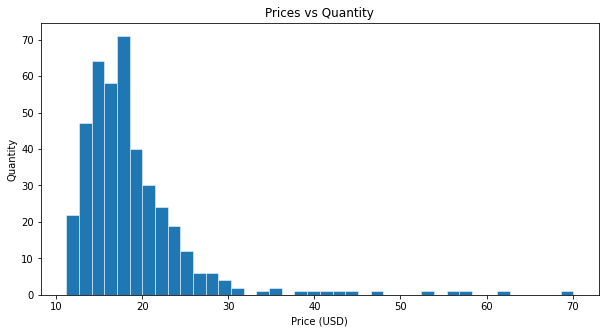

In [144]:
plt.figure(figsize=(10,5))

plt.hist(price_common.price, bins=40, linewidth=0.5, edgecolor='white')

plt.xlabel('Price (USD)')
plt.ylabel('Quantity')

plt.title('Prices vs Quantity')

In [145]:
price_common.sort_values('price', ascending=False)

,quantity,price
item_name,,
"Carnitas Burrito, Chips and Tomatillo-Red Chili Salsa",2,70.105000
"Veggie Bowl, Chicken Bowl, Chicken Burrito",3,62.280000
"Chicken Burrito, Steak Bowl, Chicken Salad Bowl",3,57.733333
"Burrito, Burrito",4,56.467500
"Canned Soda, Steak Burrito",2,52.600000
...,...,...
"Chicken Burrito, Barbacoa Burrito, Chips and Guacamole",3,11.476667
"Chicken Burrito, Chips and Guacamole, Canned Soft Drink",3,11.443333
"Chicken Soft Tacos, Chips",2,11.230000
